<a href="https://colab.research.google.com/github/KirandeepKaur1607/Mobile_Sales-Dashboard/blob/main/Sales_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

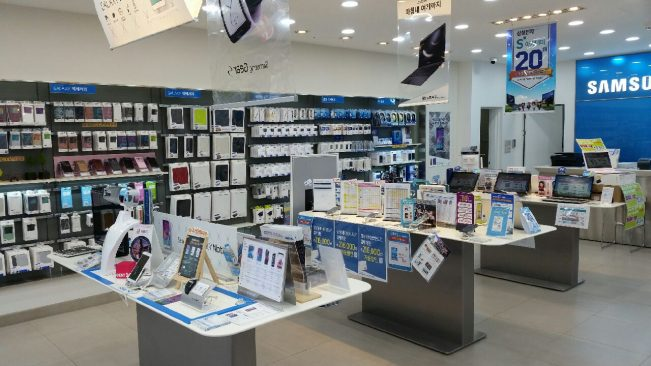

### Mobile Sales Analysis Project

In [ ]:
from IPython.display import Image, display, Markdown

display(Image("/content/Mobile-Shop-e1579767520275.jpeg"))
display(Markdown("### Mobile Sales Analysis Project"))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_excel("/content/Mobile Sales Data.xlsx")
df.head()

,Transaction ID,Day,Month,Year,Day Name,Brand,Units Sold,Price Per Unit,Customer Name,Customer Age,City,Payment Method,Customer Ratings,Mobile Model
0,1,9,10,2021,Sat,Xiaomi,6,10174.70,Lalita Ahuja,38,Ludhiana,UPI,5,Redmi Note 10
1,2,9,10,2021,Saturday,Vivo,6,10565.19,Sneha Sharma,37,Delhi,Credit Card,3,Vivo Y51
2,3,9,10,2021,Saturday,Vivo,8,58527.58,Radha Srivastava,40,Mumbai,UPI,5,Vivo S1
3,4,10,10,2021,Sunday,Xiaomi,5,25563.98,Bhavana Arora,21,Mumbai,Credit Card,4,Mi 11
4,5,10,10,2021,Sunday,OnePlus,3,48168.02,Sneha Mehta,38,Gorakhpur,Cash,5,OnePlus 9


In [ ]:
df.shape

(3835, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835 entries, 0 to 3834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3835 non-null   int64         
 1   Day               3835 non-null   int64         
 2   Month             3835 non-null   object        
 3   Year              3835 non-null   int64         
 4   Day Name          3835 non-null   object        
 5   Brand             3835 non-null   object        
 6   Units Sold        3835 non-null   int64         
 7   Price Per Unit    3835 non-null   float64       
 8   Customer Name     3835 non-null   object        
 9   Customer Age      3835 non-null   int64         
 10  City              3835 non-null   object        
 11  Payment Method    3835 non-null   object        
 12  Customer Ratings  3835 non-null   int64         
 13  Mobile Model      3835 non-null   object        
 14  Revenue           3835 n

In [ ]:
df.describe()

,Transaction ID,Day,Year,Units Sold,Price Per Unit,Customer Age,Customer Ratings,Revenue,Date,Month_Num
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835,3835.000000
mean,1918.000000,15.703781,2022.765319,4.993481,40114.036816,38.098305,3.693090,200574.964269,2023-04-07 13:31:25.893090048,6.527249
min,1.000000,1.000000,2021.000000,1.000000,10011.110000,18.000000,1.000000,10115.910000,2021-10-09 00:00:00,1.000000
25%,959.500000,8.000000,2022.000000,3.000000,25617.405000,27.500000,3.000000,83930.940000,2022-07-10 00:00:00,4.000000
50%,1918.000000,16.000000,2023.000000,5.000000,40136.490000,38.000000,4.000000,163855.840000,2023-04-07 00:00:00,7.000000
75%,2876.500000,23.000000,2024.000000,7.000000,54973.475000,49.000000,5.000000,289246.935000,2024-01-05 00:00:00,10.000000
max,3835.000000,31.000000,2024.000000,9.000000,69984.480000,59.000000,5.000000,628391.790000,2024-10-08 00:00:00,12.000000
std,1107.213469,8.822771,0.917401,2.581122,17310.488427,12.110622,1.325069,142402.093904,NaN,3.452030


In [ ]:
df.isnull().sum()

,0
Transaction ID,0
Day,0
Month,0
Year,0
Day Name,0
Brand,0
Units Sold,0
Price Per Unit,0
Customer Name,0
Customer Age,0


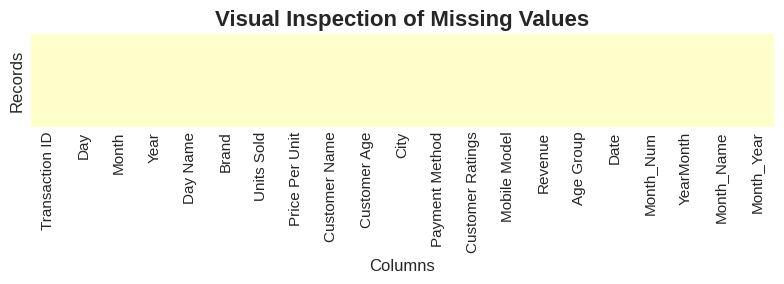

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(8,3))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd", yticklabels=False)

plt.title("Visual Inspection of Missing Values", fontsize=16, fontweight="bold")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.tight_layout()
plt.show()

SALES AND REVENUE ANALYSIS



1.Top 10 Cities by Revenue

Top 5 Cities by Revenue:
      City       Revenue
0    Delhi  2.038835e+08
1   Mumbai  1.271913e+08
2   Ranchi  3.101877e+07
3  Chennai  3.075953e+07
4   Rajkot  2.732670e+07


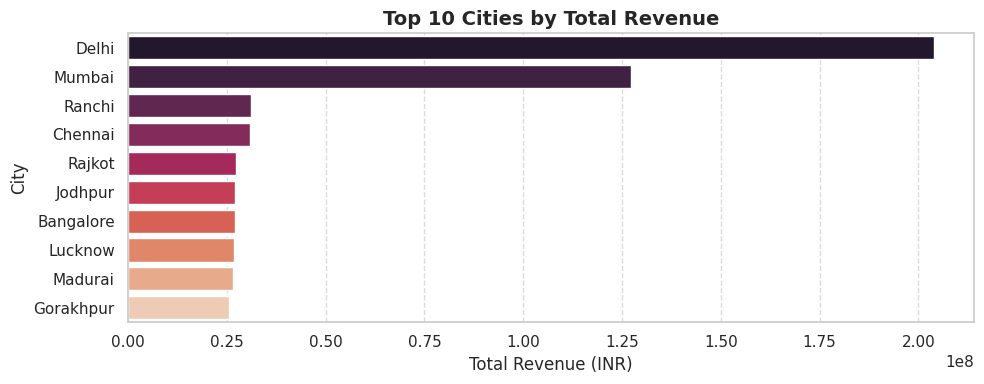

In [ ]:
city_revenue = df.groupby("City")["Revenue"].sum().sort_values(ascending=False).reset_index()
print("Top 5 Cities by Revenue:")
print(city_revenue.head())
plt.figure(figsize=(10, 4))
sns.barplot(
    data=city_revenue.head(10),
    x="Revenue",
    y="City",
    hue="City",
    palette="rocket",
    dodge=False,
    legend=False
)
plt.title("Top 10 Cities by Total Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue (INR)")
plt.ylabel("City")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2.Top Mobile Models by Revenue



Top 5 Models by Revenue:
     Mobile Model      Revenue
0       iPhone SE  59572003.52
1    OnePlus Nord  57888590.53
2  Galaxy Note 20  56005282.17
3        Vivo Y51  54837667.19
4      Galaxy S21  53270713.66


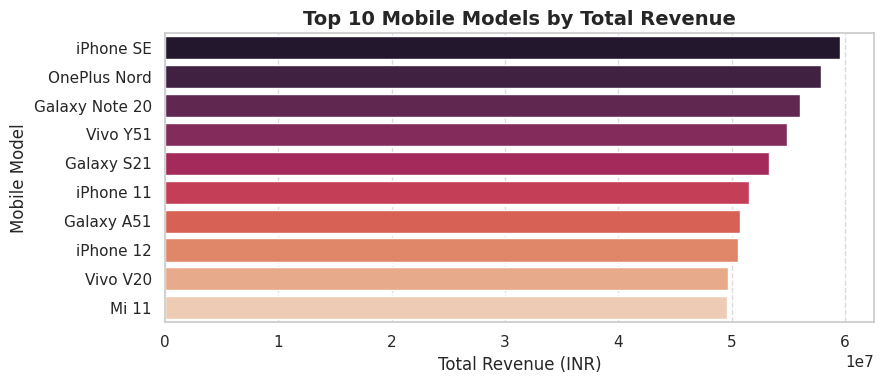

In [ ]:
df["Revenue"] = df["Units Sold"] * df["Price Per Unit"]
model_revenue = df.groupby("Mobile Model")["Revenue"].sum().sort_values(ascending=False).reset_index()


print("Top 5 Models by Revenue:")
print(model_revenue.head())

plt.figure(figsize=(9, 4))
sns.barplot(
    data=model_revenue.head(10),
    x="Revenue",
    y="Mobile Model",
    hue="Mobile Model",
    palette="rocket",
    dodge=False,
    legend=False
)
plt.title("Top 10 Mobile Models by Total Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue (INR)")
plt.ylabel("Mobile Model")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3.Number of Mobiles Sold by Brand

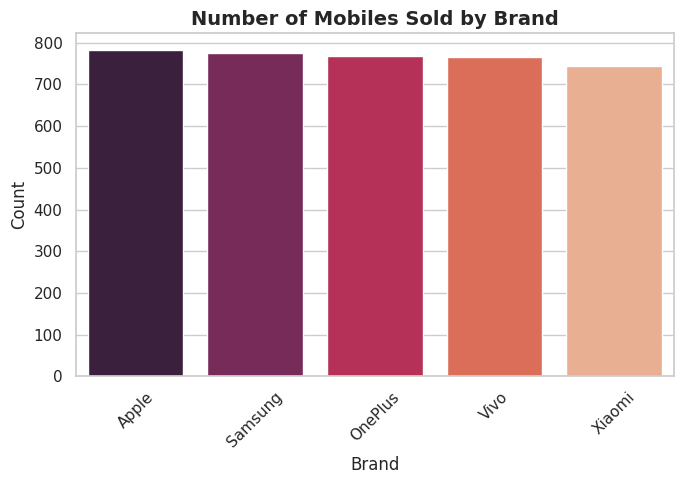

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Brand', palette='rocket', order=df['Brand'].value_counts().index)
plt.title('Number of Mobiles Sold by Brand', fontsize=14, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4.Mobile Sales Share by Brand

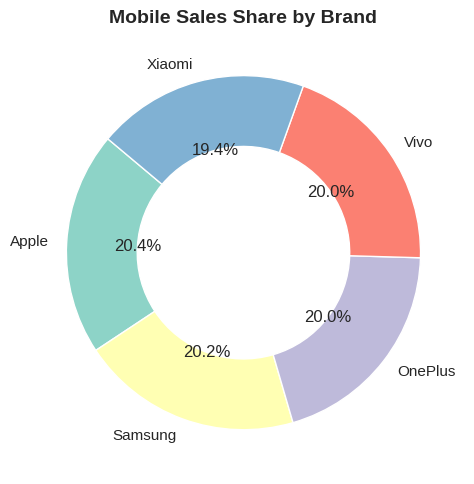

In [ ]:
brand_counts = df['Brand'].value_counts()
labels = brand_counts.index
sizes = brand_counts.values
colors = sns.color_palette('Set3', len(labels))

plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, wedgeprops=dict(width=0.4)
)

plt.title('Mobile Sales Share by Brand', fontsize=14, fontweight='bold')
plt.gca().add_artist(plt.Circle((0, 0), 0.30, fc='white'))
plt.tight_layout()
plt.show()


5.Total Sales by Calendar Month

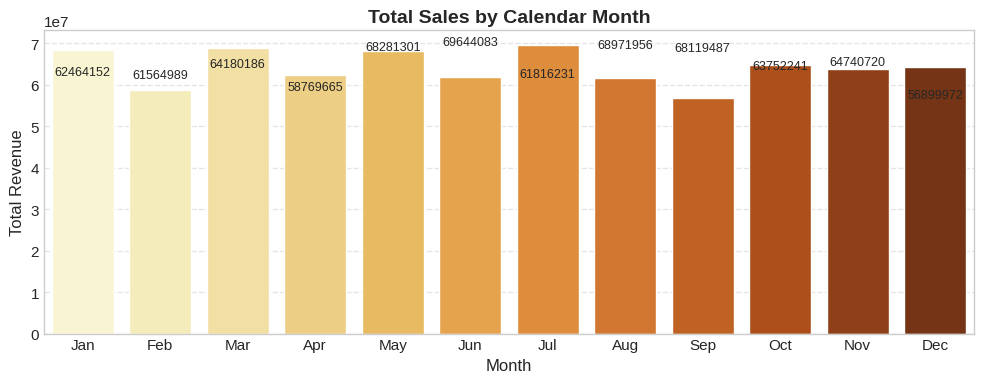

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["Month"] = df["Date"].dt.strftime("%b")
df["Month_Num"] = df["Date"].dt.month
monthly_sales = df.groupby(["Month", "Month_Num"])["Revenue"].sum().reset_index()
monthly_sales = monthly_sales.sort_values("Month_Num")

plt.figure(figsize=(10, 4))
sns.barplot(data=monthly_sales, x="Month", y="Revenue", hue="Month", palette="YlOrBr", legend=False)

for i, row in monthly_sales.iterrows():
    plt.text(i, row["Revenue"] + 1000, f"{int(row['Revenue'])}", ha='center', fontsize=9)

plt.title("Total Sales by Calendar Month", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


6.Total Revenue by Age Group

Revenue by Age Group:
  Age Group       Revenue
0       0-9           NaN
1     10-19  3.706953e+07
2     20-29  1.863534e+08
3     30-39  1.839636e+08
4     40-49  1.784779e+08
5     50-59  1.833405e+08
6     60-69           NaN


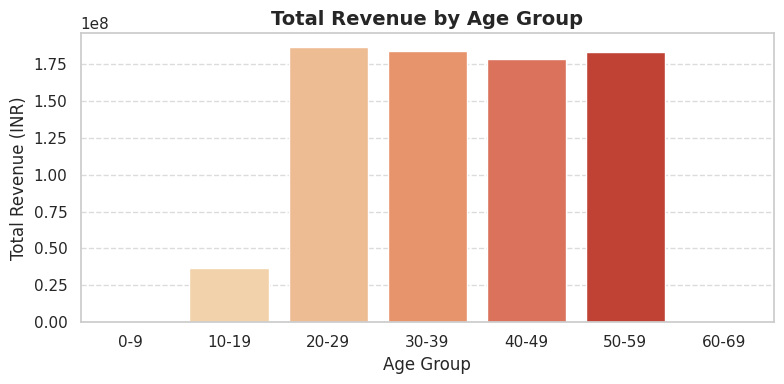

In [ ]:
def get_age_group(age):
    if age >= 100:
        return "100+"
    elif age >= 90:
        return "90-99"
    elif age >= 80:
        return "80-89"
    elif age >= 70:
        return "70-79"
    elif age >= 60:
        return "60-69"
    elif age >= 50:
        return "50-59"
    elif age >= 40:
        return "40-49"
    elif age >= 30:
        return "30-39"
    elif age >= 20:
        return "20-29"
    elif age >= 10:
        return "10-19"
    else:
        return "0-9"

df["Age Group"] = df["Customer Age"].apply(get_age_group)
age_revenue = df.groupby("Age Group")["Revenue"].sum().reindex(
    ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69"]
).reset_index()

print("Revenue by Age Group:")
print(age_revenue)
plt.figure(figsize=(8, 4))
sns.barplot(
    data=age_revenue,
    x="Age Group",
    y="Revenue",
    hue="Age Group",
    palette="OrRd",
    dodge=False,
    legend=False
)
plt.title("Total Revenue by Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Age Group")
plt.ylabel("Total Revenue (INR)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

7.Distribution of Price Per Unit and Revenue

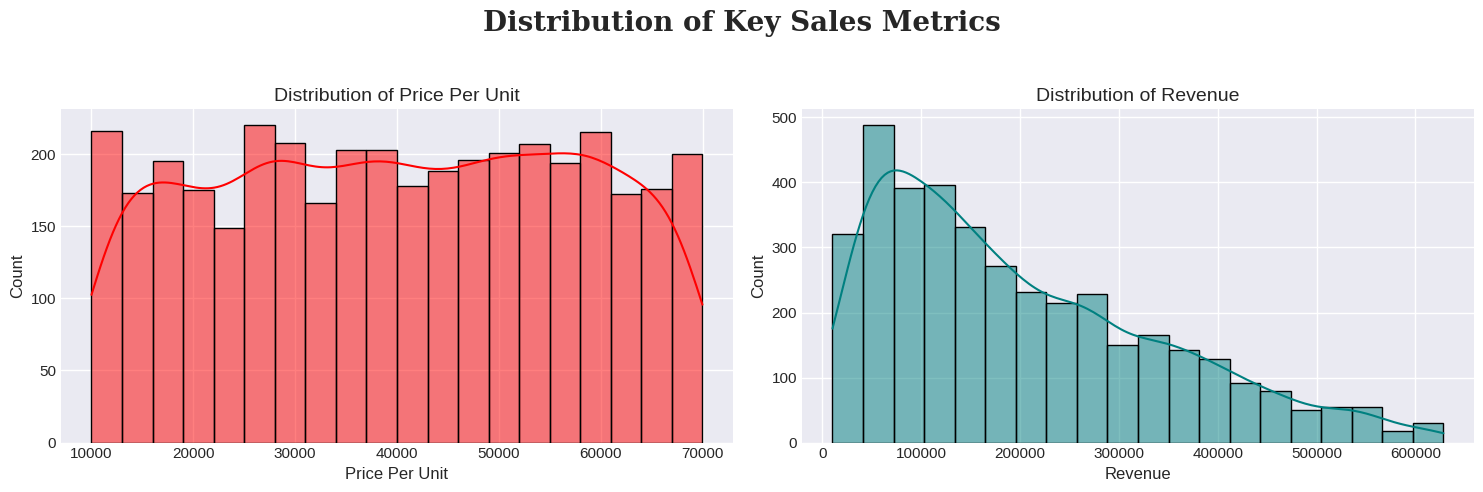

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(15,5))
plt.suptitle("Distribution of Key Sales Metrics", fontsize=20, fontweight="bold", fontfamily='serif')

# Plot 1 - Distribution of Price Per Unit
plt.subplot(1, 2, 1)
sns.histplot(df["Price Per Unit"], bins=20, kde=True, color="red", edgecolor="black")
plt.xlabel("Price Per Unit", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Price Per Unit", fontsize=14)

# Plot 2 - Distribution of Revenue
plt.subplot(1, 2, 2)
sns.histplot(df["Revenue"], bins=20, kde=True, color="teal", edgecolor="black")
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Revenue", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

8.Revenue Contribution by *City*

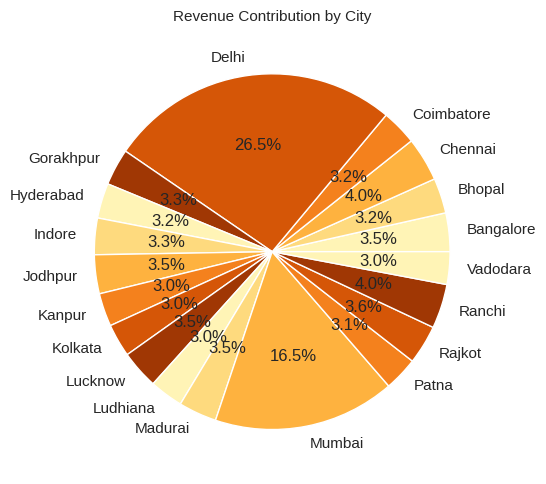

In [ ]:
city_rev = df.groupby("City")["Revenue"].sum()
plt.figure(figsize=(6,5))
plt.pie(city_rev, labels=city_rev.index, autopct='%1.1f%%', colors=sns.color_palette("YlOrBr"))
plt.title("Revenue Contribution by City", fontsize=11)
plt.tight_layout()
plt.show()

9.Revenue and Units sold by City

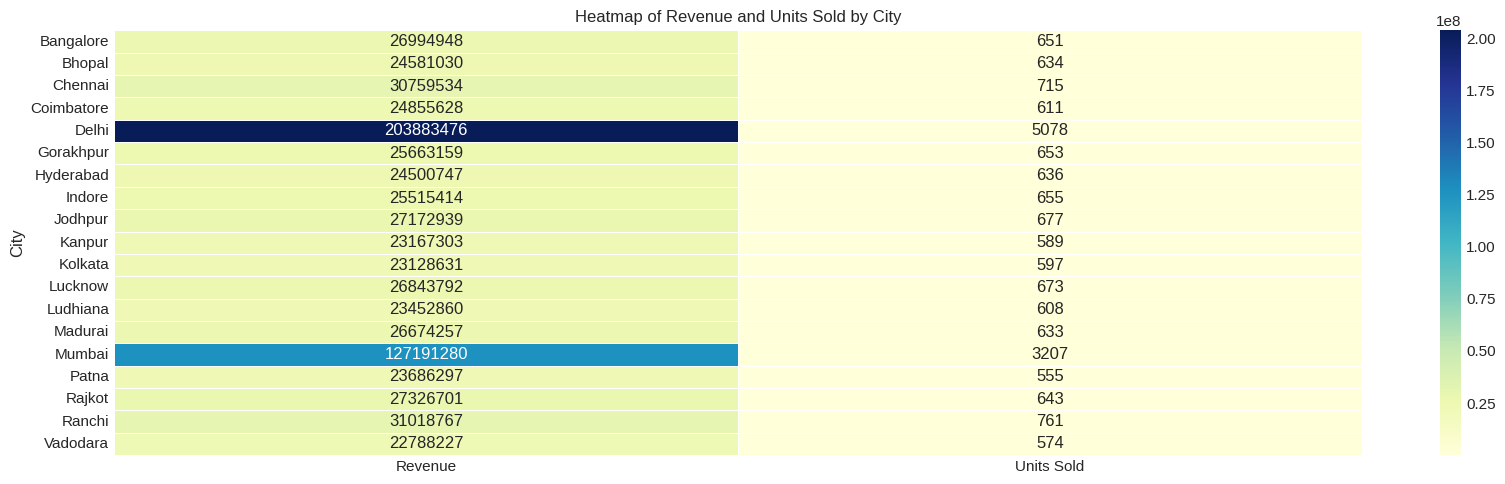

In [ ]:
city_metrics = df.groupby("City")[["Revenue", "Units Sold"]].sum()
plt.figure(figsize=(17, 5))
sns.heatmap(city_metrics, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap of Revenue and Units Sold by City")
plt.tight_layout()
plt.show()

10.Correlation between Price Per Unit and Revenue

Correlation between Price Per Unit and Revenue: 0.61


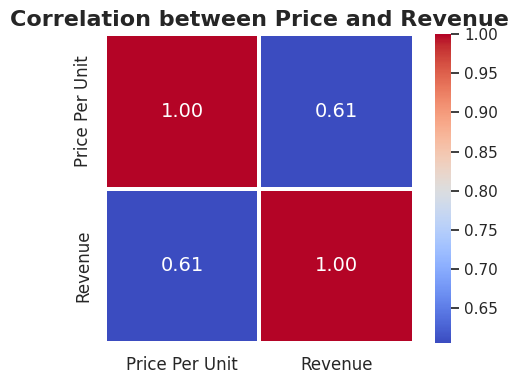

In [ ]:
correlation = df['Price Per Unit'].corr(df['Revenue'])

print(f"Correlation between Price Per Unit and Revenue: {correlation:.2f}")
subset = df[['Price Per Unit', 'Revenue']]
corr = subset.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True,
            linewidths=1.5, linecolor='white', annot_kws={"size": 14})

plt.title("Correlation between Price and Revenue", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

11.Monthly Average Sales

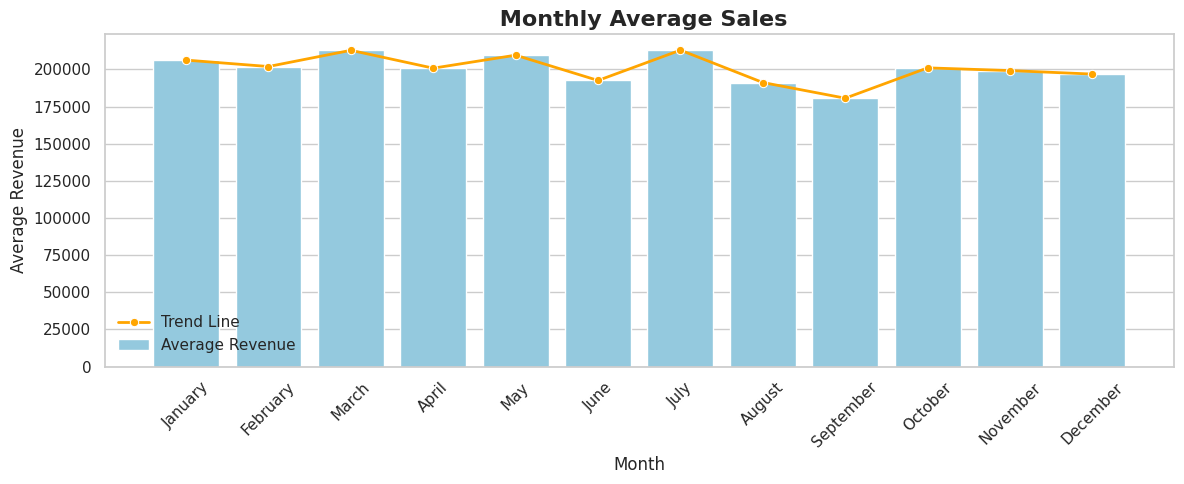

In [ ]:
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-muted")
df['Date_Str'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
df['Date'] = pd.to_datetime(df['Date_Str'], format='%Y-%b-%d', errors='coerce')
df = df.drop(columns=['Date_Str'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month_Name'] = df['Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)
monthly_avg_sales = df.groupby('Month_Name')['Revenue'].mean().reindex(month_order)

# Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_avg_sales.index, y=monthly_avg_sales.values, color='skyblue', label="Average Revenue")
sns.lineplot(x=monthly_avg_sales.index, y=monthly_avg_sales.values, color='orange', marker='o', linewidth=2, label="Trend Line")
plt.title(" Monthly Average Sales", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

CUSTOMER SATISFACTION ANALYSIS

1.Customer Ratings by Brand

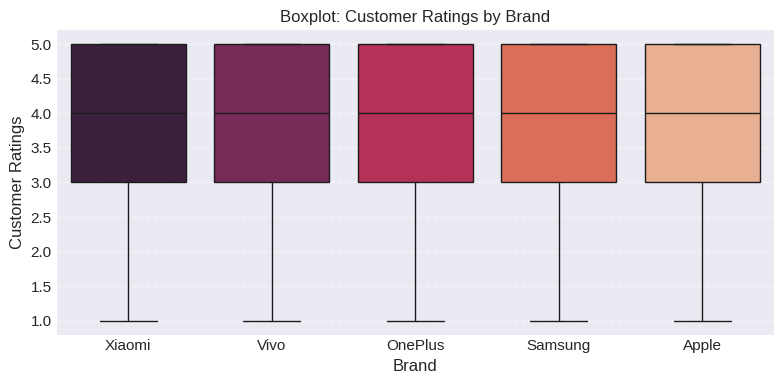

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_brands,
    x="Brand",
    y="Customer Ratings",
    hue="Brand",
    palette="rocket",
    legend=False     )

plt.title("Boxplot: Customer Ratings by Brand")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

2.Number of Satisfied Customers

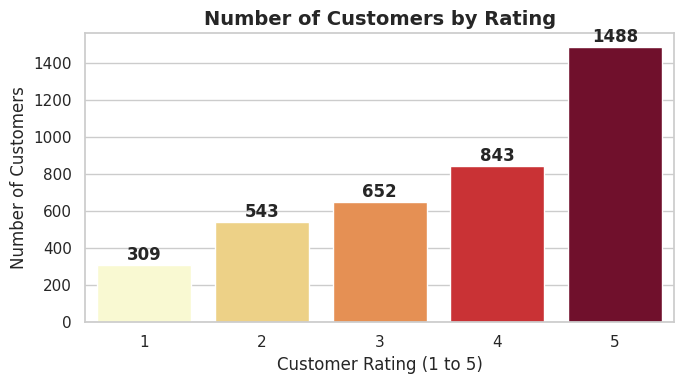

In [ ]:
sns.set(style="whitegrid")
rating_counts = df['Customer Ratings'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(7, 4))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, legend=False, palette="YlOrRd")
plt.title("Number of Customers by Rating", fontsize=14, fontweight='bold')
plt.xlabel("Customer Rating (1 to 5)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
for i, val in enumerate(rating_counts.values):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

3.Customer Rating Distribution

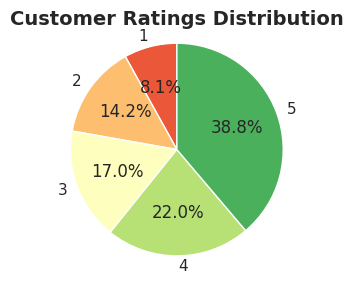

In [ ]:
rating_counts = df['Customer Ratings'].value_counts().sort_index()

plt.figure(figsize=(3,3))
colors = sns.color_palette('RdYlGn', len(rating_counts))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Customer Ratings Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

4.Distribution of Customer Ratings by City

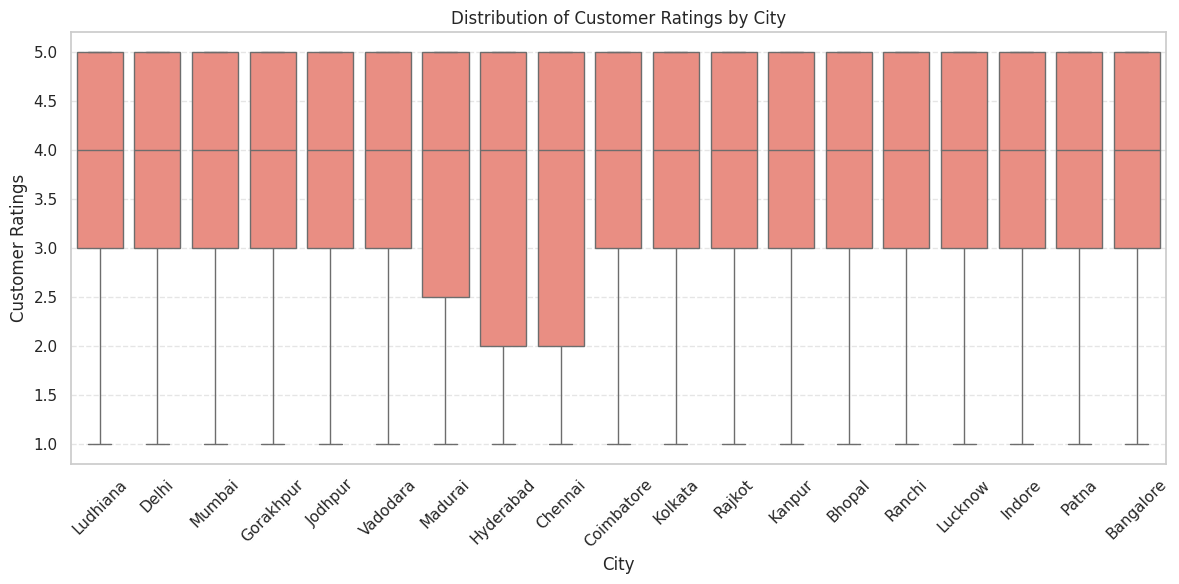

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="City", y="Customer Ratings", color="salmon")
plt.title("Distribution of Customer Ratings by City")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


5.Payment Methods Distribution

Payment Method Usage:
  Payment Method  Count
0            UPI   1011
1     Debit Card    948
2    Credit Card    947
3           Cash    929


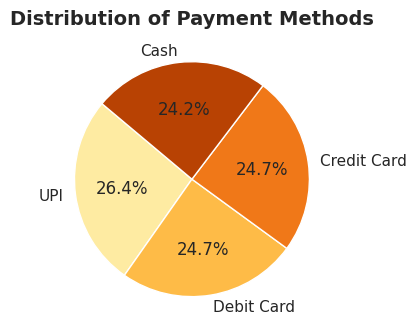

In [ ]:
payment_counts = df["Payment Method"].value_counts().reset_index()
payment_counts.columns = ["Payment Method", "Count"]

print("Payment Method Usage:")
print(payment_counts)

plt.figure(figsize=(4,4))
colors = sns.color_palette("YlOrBr", len(payment_counts))
plt.pie(payment_counts["Count"], labels=payment_counts["Payment Method"], autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Distribution of Payment Methods", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


TIME SERIES INSIGHTS

Time Series Sales Trend

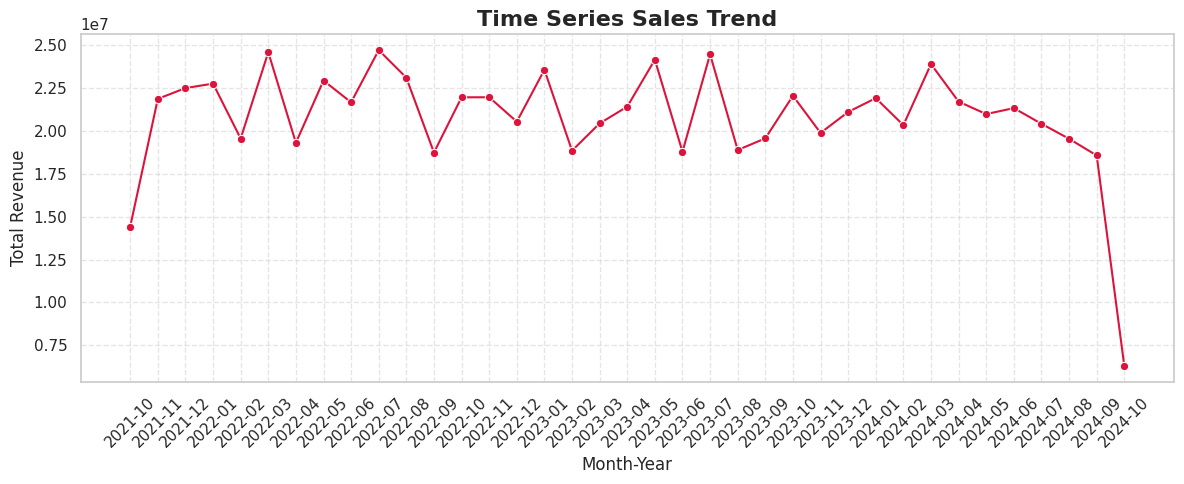

In [ ]:
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-muted")
df['Date_Str'] = df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str)
df['Date'] = pd.to_datetime(df['Date_Str'], format='%Y-%b-%d', errors='coerce')
df = df.drop(columns=['Date_Str'])
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month_Year'] = df['Date'].dt.to_period('M').astype(str)
monthly_sales = df.groupby('Month_Year')['Revenue'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='Month_Year', y='Revenue', marker='o', color='crimson')
plt.title("Time Series Sales Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()